In [1]:
!git clone https://github.com/i-atul/Cognifyz-Machine-Learning-Internship.git


Cloning into 'Cognifyz-Machine-Learning-Internship'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 4), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 439.28 KiB | 10.22 MiB/s, done.
Resolving deltas: 100% (4/4), done.


# **Task 1: Predict Restaurant Ratings**

**Objective:**
Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.

**Steps:**

* Preprocess the dataset by handling missing values,encoding categorical variables, and splitting the datainto training and testing sets.
  
* Select a regression algorithm (e.g., linear regression,decision tree regression) and train it on the training data.

* Evaluate the model's performance using appropriateregression metrics (e.g., mean squared error, R-squared)on the testing data.

* Interpretation of Model Results & Analysis of Influential Features


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score 

In [3]:
df = pd.read_csv("/kaggle/working/Cognifyz-Machine-Learning-Internship/Dataset .csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape

(9551, 21)

In [6]:
def dataset_info(df, name):
    print(f"\n {name} Dataset:")
    print(df.columns)
    print(df.info())
    print(df.describe())
    print("Missing values:", df.isnull().sum())
    print("Duplicates:", df.duplicated().sum())

In [7]:
dataset_info(df, "Restaurant")


 Restaurant Dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Lo

In [8]:
# Remove all NULL Value
df = df.dropna()

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df["Aggregate rating"].describe()

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [11]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [12]:
fig = px.pie(df,names ="Aggregate rating",hole = 0.3,template ="plotly_white")
fig.show()

In [13]:
fig = px.scatter(df,x ="Average Cost for two",y="Price range",color= "Aggregate rating",template="plotly_white")
fig.show()

In [14]:
fig = px.scatter(df,x ="Has Online delivery",y="Price range",color= "Aggregate rating",template="plotly_white")
fig.show()

In [15]:
df.dtypes


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [16]:
label_encoder = LabelEncoder()

columns_to_encode = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text']

# categorical columns encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# ing 'Yes' and 'No' to numerical values '1'and '0' (Binary)
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
binary_mapping = {'No': 0, 'Yes': 1}

for column in binary_columns:
    df[column] = df[column].map(binary_mapping)


In [17]:
print(df.head())

   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3742           162    73     8677       171   
1        6304287             3167           162    73     6047       592   
2        6300002             2892           162    75     4676       308   
3        6318506             4700           162    75     8682       860   
4        6314302             5515           162    75     8681       860   

   Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0               172  121.027535  14.565443       920  ...         0   
1               600  121.014101  14.553708      1111  ...         0   
2               314  121.056831  14.581404      1671  ...         0   
3               873  121.056475  14.585318      1126  ...         0   
4               873  121.057508  14.584450      1122  ...         0   

   Has Table booking  Has Online delivery  Is delivering now  \
0                  1                    0           

In [18]:
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
              'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency'], axis=1)

In [19]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


/tmp/ipykernel_13/3745870068.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Aggregate rating', ylabel='Density'>

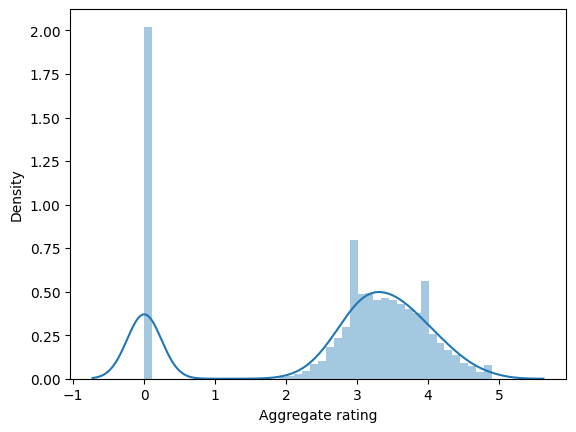

In [20]:

sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

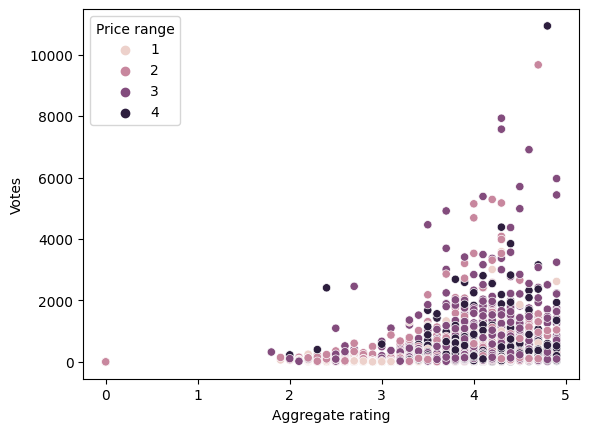

In [21]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



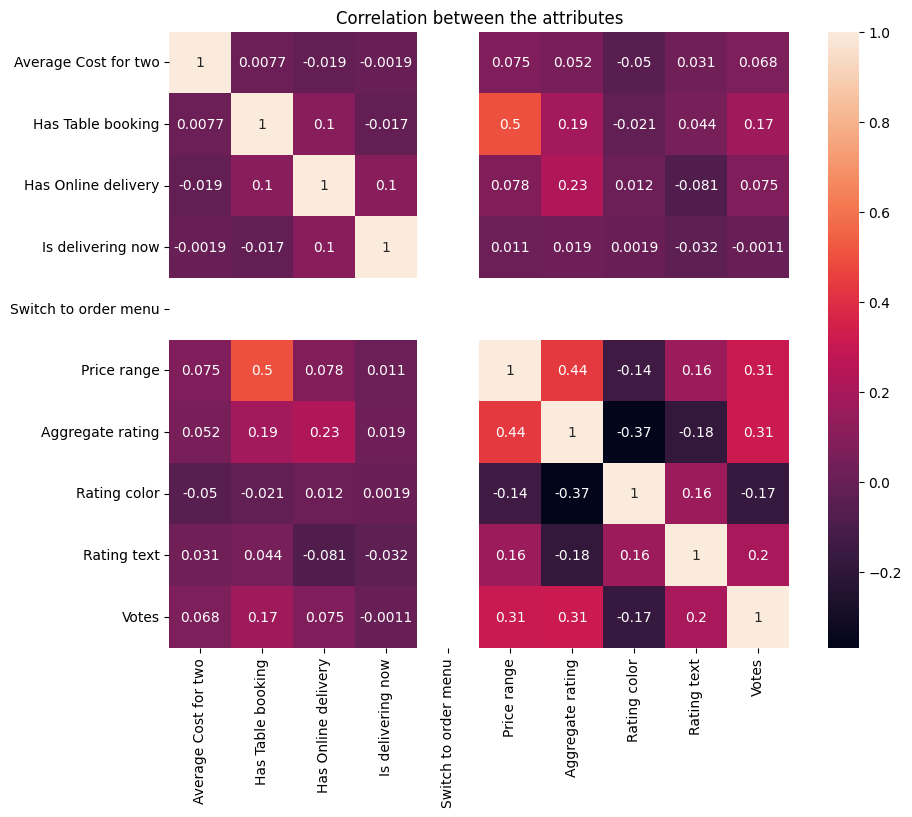

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [23]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [24]:
# Spliting Data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=250)
x_train.head()
y_train.head()

9453    3.8
3230    3.9
6529    4.2
2576    2.8
1907    3.0
Name: Aggregate rating, dtype: float64

In [25]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (8587, 9)
x_test:  (955, 9)
y_train:  (8587,)
y_test:  (955,)


In [26]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor()
}

In [27]:
# Train, predict, and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"\n📌 {name} Performance:")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R2 Score: {r2:.2f}")


📌 Linear Regression Performance:
  Mean Absolute Error: 0.99
  Mean Squared Error: 1.43
  R2 Score: 0.38

📌 Decision Tree Performance:
  Mean Absolute Error: 0.14
  Mean Squared Error: 0.05
  R2 Score: 0.98


 # Interpretation of Model Results & Analysis of Influential Features




* The Decision Tree Regressor model achieved an R² score of 0.98 and a very low MSE of 0.05, indicating that it predicts restaurant ratings with high accuracy and minimal error. This suggests that the model is well-fitted and effectively captures the patterns in the data related to restaurant ratings.

* Higher-priced restaurants tend to receive better ratings. It shows that people may be more satisfied when they feel they’re getting a high-value experience, even at a higher cost.


